In [1]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header,compare

HTML(header())

# Morphomathematical operators

## Definitions

### Image
The image $X$ is defined as a the set of pixels, connect or not, equal to $1$ (or True), the backgound being set to $0$ (or False).

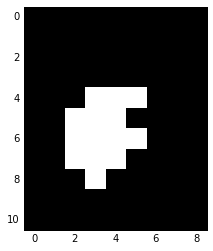

In [2]:
import matplotlib.pyplot as plt
import numpy as np
X = np.asarray([[0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0],
                [0,0,0,1,1,1,0,0,0],
                [0,0,1,1,1,0,0,0,0],
                [0,0,1,1,1,1,0,0,0],
                [0,0,1,1,1,0,0,0,0],
                [0,0,0,1,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0]])
plt.imshow(X,interpolation='nearest',cmap=plt.cm.gray);

### Structuring element

similarily one define a structuring element $B$ as a set of pixels (connected or not) having one origin $o$. Example of a 3x3 centered structuring element:

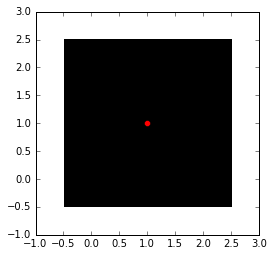

In [3]:
B = np.ones((3,3))
plt.imshow(B,interpolation='nearest',cmap=plt.cm.gray)
plt.plot(1,1,'or')
plt.gca().set_xlim(-1,3)
plt.gca().set_ylim(-1,3);

## Basic operations
### Image complement
Image complement consist in seting True pixels to false an False pixels to True, Image and background are switched.

$$X^c = \{x: x \notin X\}$$

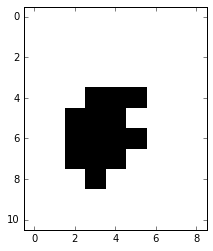

In [4]:
Xc = 1-X
plt.imshow(Xc,interpolation='nearest',cmap=plt.cm.gray);

### Symmetry

$\hat X$ is the reflection of $X$ through the origin

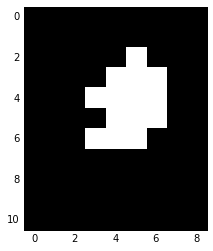

In [5]:
Xs = X[:,-1::-1][-1::-1,:]
plt.imshow(Xs,interpolation='nearest',cmap=plt.cm.gray);

### Translation
The $B_x$ structuring undergoes a 2D translation in the pixel $x = (3,5)$.

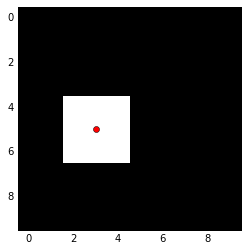

In [6]:
Bx = np.zeros((10,10))
x = (3,5)
Bx[x[1]-1:x[1]+2,x[0]-1:x[0]+2] = B
plt.plot(3,5,'or')
plt.imshow(Bx,interpolation='nearest',cmap=plt.cm.gray);

### Difference
$$A-B = \{x: x \in A, x \notin B\} = A \cap B^c$$

### Dilation
Dilation is defined such as:
$$X \oplus B = \{x : \hat B_x \cap X \ne \phi \}$$

### Erosion
Erosion is defined such as:
$$X \ominus B = \{x : B_x \subseteq X  \}$$

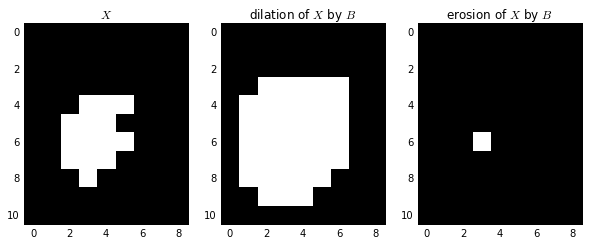

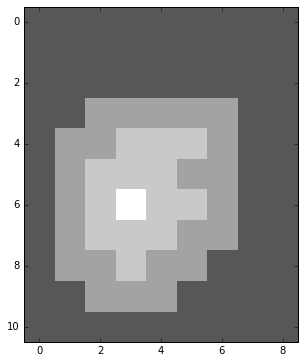

In [7]:
from skimage.morphology import disk,erosion,dilation,square
B = square(3)
X_dil = dilation(X,selem=B)
X_ero = erosion(X,selem=B)

plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
plt.imshow(X,interpolation='nearest',cmap=plt.cm.gray)
plt.title('$X$')
plt.subplot(1,3,2)
plt.imshow(X_dil,interpolation='nearest',cmap=plt.cm.gray)
plt.title('dilation of $X$ by $B$')
plt.subplot(1,3,3)
plt.imshow(X_ero,interpolation='nearest',cmap=plt.cm.gray)
plt.title('erosion of $X$ by $B$')
plt.figure(figsize=[6,6])
plt.imshow(X,interpolation='nearest',cmap=plt.cm.gray,alpha=.3)
plt.imshow(X_ero,interpolation='nearest',cmap=plt.cm.gray,alpha=.3)
plt.imshow(X_dil,interpolation='nearest',cmap=plt.cm.gray,alpha=.3);

### Duality

There is a duality between erosion and dilation

$$(X \ominus B )^c = X^c \oplus \hat B$$
$$(X \oplus B)^c = X^c \ominus \hat B$$

In other words, dilating $X$ is the same as eroding $X^c$ by the symetrical structuring element

demonstration for $(X \ominus B )^c = X^c \oplus \hat B$:

$$(X \ominus B)^c = \{x : B_x \subseteq X  \}^c$$

if $B_x$ is include in $X$:

$$B_x \cap X^c = \phi$$

so:

$$(X \ominus B)^c = \{x : B_x \cap X^c = \phi  \}^c$$

by using the complement:

$$\{x : B_x \cap X^c = \phi  \}^c = \{x : B_x \cap X^c \neq \phi  \}$$

equality becomes:

$$(X \ominus B)^c = \{x : B_x \cap X^c \neq \phi  \} = X^c \oplus \hat B $$



### Properties of the basic operations

Dilation is:
* commutative

$$ X \oplus B = B \oplus X$$

* associative

$$X \oplus (B \oplus C) = (X\oplus B) \oplus C$$

* translation invariant

$$ X_h \oplus B = (X \oplus B)_h$$

* increasing

$$ A_1 \subseteq A_2 \implies A_1 \oplus B \subseteq A_2 \oplus B$$
$$ B_1 \subseteq B_2 \implies A \oplus B_1 \subseteq A \oplus B_2$$

Erosion is:

* NOT commutative

$$ X \ominus B \neq B \ominus X$$

* translation invariant

$$ X_h \ominus B = (X \ominus B)_h$$

* increasing

$$ A_1 \subseteq A_2 \implies A_1 \ominus B \subseteq A_2 \ominus B$$
but (one erode less !)
$$ B_1 \subseteq B_2 \implies A \ominus B_1 \supseteq A \ominus B_2$$

Dilation by the union of two structuring elements:
    
$$X \oplus (B \cup C) = (X \oplus B) \cup (X \oplus C) = (B \cup C) \oplus X$$    
    
Erosion by the union of two structuring elements:

$$ X \ominus (B \cup C) = (X \ominus B) \cap (X \ominus C)$$

$$(X \ominus B) \ominus C = X \ominus (B \oplus C) $$

## Combined operations
More complex operation can be achieved by combining two ore more basis operators, the simplest ones are the opening and the closing.


### Opening
Opening consist in applying in succession one erosion followed by one dilation, both using a same structuring element.

$$ X \circ B = (X \ominus B) \oplus B $$ 

Opening 'opens' small gaps existing in the shape.


### Closing
Opening consist in applying in succession one dilation followed by one erosion, both using a same structuring element.

$$ X \bullet B = (X \oplus B) \ominus B $$ 

Closing 'closes' the gaps present in the shape.

Opening and closing are illustrated below with a 3x3 square structuring element $B$:

Therse is an opening and closing duality:

$$(X \circ B)^c = X^c \bullet B $$

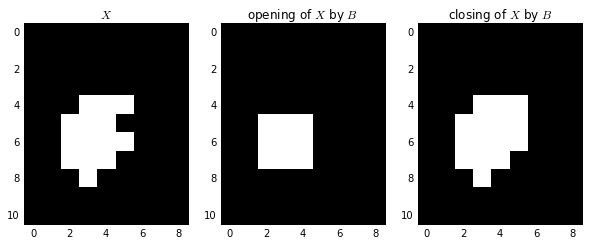

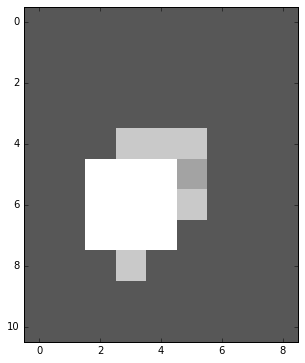

In [8]:
B = square(3)
X_dil = dilation(X,selem=B)
X_ero = erosion(X,selem=B)

X_open = dilation(X_ero,selem=B)
X_close = erosion(X_dil,selem=B)

plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
plt.imshow(X,interpolation='nearest',cmap=plt.cm.gray)
plt.title('$X$')
plt.subplot(1,3,2)
plt.imshow(X_open,interpolation='nearest',cmap=plt.cm.gray)
plt.title('opening of $X$ by $B$')
plt.subplot(1,3,3)
plt.imshow(X_close,interpolation='nearest',cmap=plt.cm.gray)
plt.title('closing of $X$ by $B$')
plt.figure(figsize=[6,6])
plt.imshow(X,interpolation='nearest',cmap=plt.cm.gray,alpha=.3)
plt.imshow(X_open,interpolation='nearest',cmap=plt.cm.gray,alpha=.3)
plt.imshow(X_close,interpolation='nearest',cmap=plt.cm.gray,alpha=.3);

some examples with a 3x3 structuring element $B$

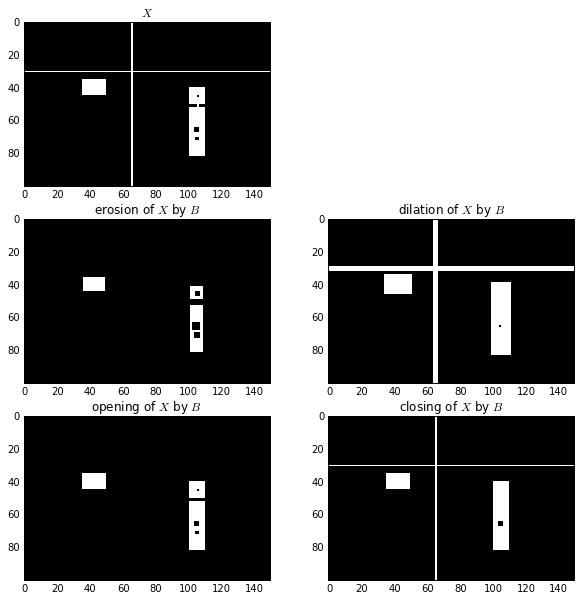

In [9]:
import numpy as np
X = np.zeros((100, 150), dtype=bool)
X[30, :] = 1
X[:, 65] = 1
X[35:45, 35:50] = 1
X[40:50,100:110] = 1
X[52:82,100:110] = 1
X[50:52,105:106] = 1
X[45:46,105:106] = 0
X[70:72,104:106] = 0
X[64:67,103:106] = 0

B = square(3)
X_dil = dilation(X,selem=B)
X_ero = erosion(X,selem=B)

X_open = dilation(X_ero,selem=B)
X_close = erosion(X_dil,selem=B)

plt.figure(figsize=[10,10])
plt.subplot(3,2,1)
plt.imshow(X,interpolation='nearest',cmap=plt.cm.gray)
plt.title('$X$')
plt.subplot(3,2,3)
plt.imshow(X_ero,interpolation='nearest',cmap=plt.cm.gray)
plt.title('erosion of $X$ by $B$')
plt.subplot(3,2,4)
plt.imshow(X_dil,interpolation='nearest',cmap=plt.cm.gray)
plt.title('dilation of $X$ by $B$')
plt.subplot(3,2,5)
plt.imshow(X_open,interpolation='nearest',cmap=plt.cm.gray)
plt.title('opening of $X$ by $B$')
plt.subplot(3,2,6)
plt.imshow(X_close,interpolation='nearest',cmap=plt.cm.gray)
plt.title('closing of $X$ by $B$');


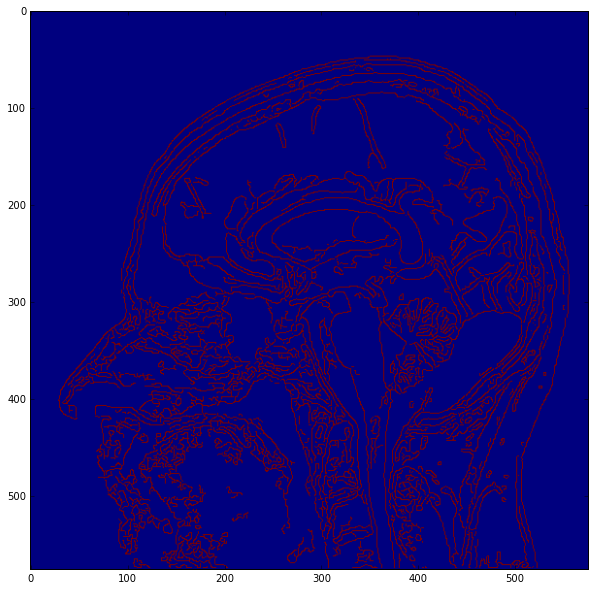

In [10]:
from skimage.io import imread
from skimage import feature

ct = imread('https://upload.wikimedia.org/wikipedia/commons/5/5f/MRI_EGC_sagittal.png')[-1::-1,:,:]
canny = feature.canny(ct[:,:,0],low_threshold=.1*255,high_threshold=.4*255)*255

plt.figure(figsize=[10,10])
plt.imshow(canny[-1::-1,:]);

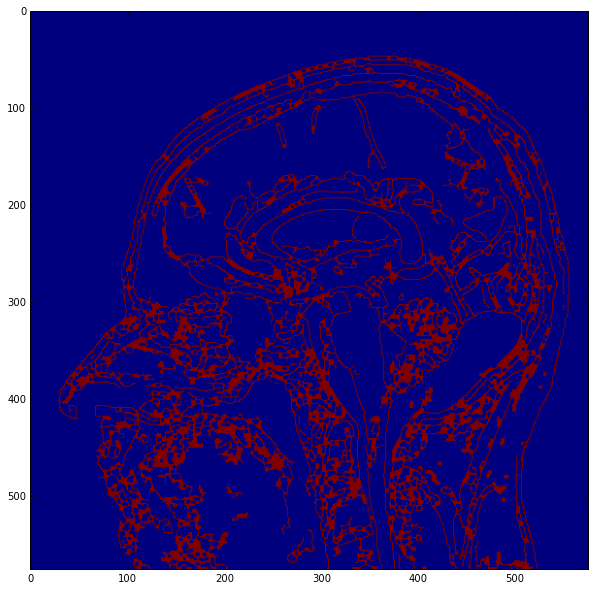

In [11]:
selem = square(3)
ct_close = erosion(dilation(canny,selem=selem),selem=selem)
plt.figure(figsize=[10,10])
plt.imshow(ct_close[-1::-1,:]);

### Properties of the combined operations

Opening is:

* anti-extensive

$$X \circ B \subseteq X$$

* idempotent

$$ (X \circ B)\circ B = X \circ B$$
$$ (X \circ B)\circ \dots \circ B = X \circ B$$

Closing is:

* extensive

$$ X \subseteq X \bullet B$$

* idempotent
$$ (X \bullet B)\bullet B = X \bullet B$$
$$ (X \bullet B)\bullet \dots \bullet B = X \bullet B$$


## The Hit-or-Miss transform

One define two disjoint structuring elements $B_1$ and $B_2$

the Hit-or-Miss transform is:

$$ X \otimes B =  \{ X : B_1 \subset X \; \text{and} \; B_2 \subset X^c\}$$

$$ X \otimes B = (X \ominus B_1) \cap (X^c \ominus B_2) $$

which it is equivallent to a binary template matching.

example of structuring elements:

$$
\begin{matrix}
  \cdot & 1    & \cdot \\
  0     & 1    & 1 \\
  0     & 0    & \cdot
 \end{matrix}
 $$

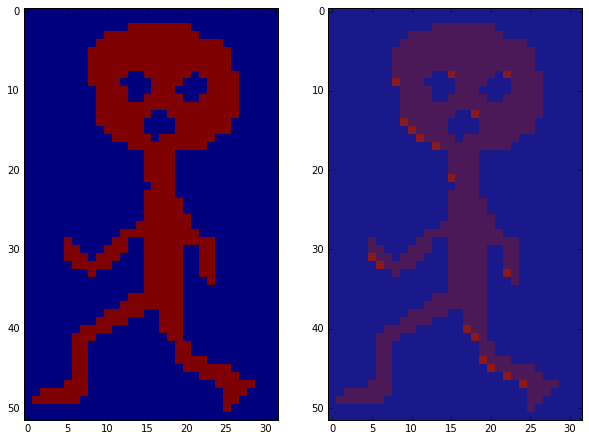

In [12]:
def hit_or_miss(X,B12):
    B1 = B12 == 1
    B2 = B12 == 0
    r = np.logical_and(erosion(X,B1),erosion(1-X,B2))
    return r

X = (imread('http://homepages.ulb.ac.be/~odebeir/data/man.tif')>0)[:,:,0].astype(np.uint8)
B12_a = np.array([[2,1,2],[0,1,1],[0,0,2]]) # . are coded with 2

HoM = hit_or_miss(X,B12_a)  

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(X,interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X,interpolation='nearest',alpha = .8)
plt.imshow(HoM,interpolation='nearest',alpha=.5);


with the following elements:
$$
\begin{matrix}
  \cdot & 1    & \cdot \\
  1     & 1    & 0 \\
  \cdot & 0    & 0
 \end{matrix}
$$

and

$$
\begin{matrix}
  \cdot &  0  & 0 \\
  1     & 1    & 0 \\
  \cdot & 1    & \cdot
 \end{matrix}
$$

and

$$
\begin{matrix}
  0 &  0  & \cdot \\
  0     & 1    & 1 \\
  \cdot & 1    & \cdot
 \end{matrix}
$$

$X$ becomes:

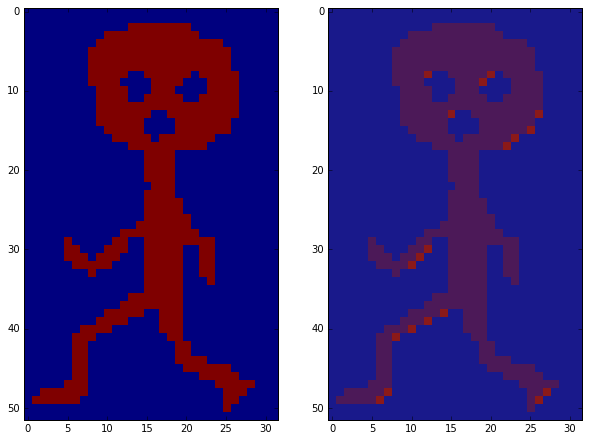

In [13]:
B12_b = B12_a[:,-1::-1]

HoM = hit_or_miss(X,B12_b)  

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(X,interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X,interpolation='nearest',alpha = .8)
plt.imshow(HoM,interpolation='nearest',alpha=.5);


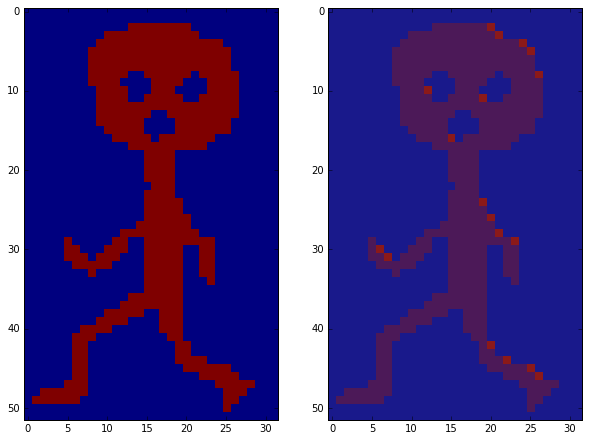

In [14]:
B12_c = B12_b[-1::-1,:]

HoM = hit_or_miss(X,B12_c)  

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(X,interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X,interpolation='nearest',alpha = .8)
plt.imshow(HoM,interpolation='nearest',alpha=.5);


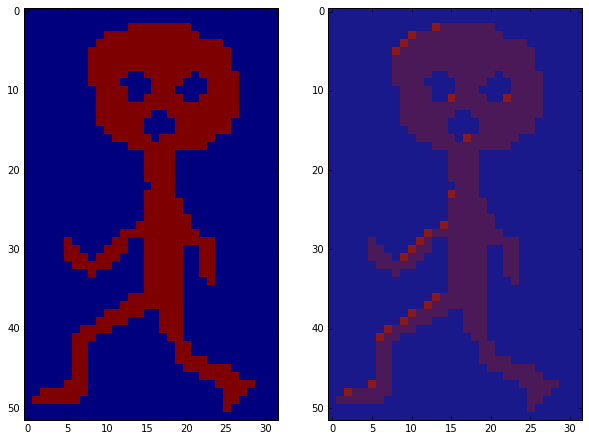

In [15]:
B12_d = B12_c[:,-1::-1]

HoM = hit_or_miss(X,B12_d)

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(X,interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X,interpolation='nearest',alpha = .8)
plt.imshow(HoM,interpolation='nearest',alpha=.5);


### other Hit-or-Miss structuring elements:

* isolated points
    
    $$
\begin{matrix}
  0 &  0  & 0 \\
  0     & 1    & 0 \\
  0 & 0    & 0
 \end{matrix}
$$

* terminaisons (+ 3 rotations)

$$
\begin{matrix}
  \cdot &  \cdot  & \cdot \\
  0     & 1    & 0 \\
  0 & 0    & 0
 \end{matrix}
$$ 

* triple point detection on a skeleton (+ 3 rotations)

$$
\begin{matrix}
  0 &  1  & 0 \\
  0     & 1    & 0 \\
  1 & 0    & 1
 \end{matrix}
$$ 

and

$$
\begin{matrix}
  1 &  0  & 0 \\
  0     & 1    & 0 \\
  1 & 0    & 1
 \end{matrix}
$$ 

* pruning (+ 3 rotations)

$$
\begin{matrix}
  0 &  0  & 0 \\
  0     & 1    & 0 \\
  0 & \cdot    & \cdot
 \end{matrix}
$$ 

and

$$
\begin{matrix}
  0 &  0  & 0 \\
  0     & 1    & 0 \\
  \cdot & \cdot    & 0
 \end{matrix}
$$ 



    

>see also:
* Morphological algorithms [MMIP](../00-Preface/06-References.ipynb#[MMIP]) p255-288